In [1]:
import pandas as pd
import numpy as pn
import sklearn

In [2]:
data = pd.read_excel("houses_for_rent_madrid.xlsx")

In [3]:
data.dtypes

Id                int64
District         object
Address          object
Number           object
Area             object
Rent              int64
Bedrooms        float64
Sq.Mt             int64
Floor           float64
Outer           float64
Elevator        float64
Penthouse         int64
Cottage           int64
Duplex            int64
Semidetached      int64
dtype: object

In [4]:
data.describe(include='all')

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2089.000000,2089,2089,747,2085,2089.000000,2000.000000,2089.000000,1948.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,NaN,20,1336,137,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Salamanca,Piso en Recoletos,1,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,313,25,29,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1094.026807,NaN,NaN,NaN,NaN,1932.249402,2.483000,128.919579,25.662731,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,630.612544,NaN,NaN,NaN,NaN,1495.474485,1.305206,115.745014,975.065350,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,1.000000,NaN,NaN,NaN,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,550.000000,NaN,NaN,NaN,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1094.000000,NaN,NaN,NaN,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1636.000000,NaN,NaN,NaN,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
data.shape

(2089, 15)

## Part 1: Remove columns "Id", "District", "Address", "Number"

In [6]:
# Remove Id, Dstrict, Address, and Number
 
columns_to_remove = ["Id", "District", "Address", "Number"]

delete_tempo = data.drop(columns=columns_to_remove)

print(delete_tempo)

                      Area  Rent  Bedrooms  Sq.Mt  Floor  Outer  Elevator  \
0     Malasaña-Universidad  2490       3.0     97    7.0    1.0       1.0   
1                 Simancas  1300       3.0    110    4.0    1.0       1.0   
2          Chueca-Justicia   800       NaN     33    NaN    NaN       0.0   
3               San Isidro   600       1.0     45    2.0    1.0       1.0   
4                  Acacias  1900       1.0     90    7.0    1.0       1.0   
...                    ...   ...       ...    ...    ...    ...       ...   
2084  Lavapiés-Embajadores  1450       3.0    100    4.0    1.0       1.0   
2085            Marroquina   900       3.0     85    4.0    1.0       1.0   
2086            Castellana  3500       5.0    300    3.0    1.0       1.0   
2087              Arapiles  1299       2.0     90    0.0    0.0       1.0   
2088            Valdezarza  1300       3.0    115    2.0    1.0       1.0   

      Penthouse  Cottage  Duplex  Semidetached  
0             1        0  

## Part 2: Imputate missing "Bedrooms", "Floors" and "Sq.Mt"

In [7]:
# Imputate missing Bedrooms, Floors and Area

from sklearn.impute import SimpleImputer

# Imputate
columns_to_impute = ["Bedrooms", "Floor", "Sq.Mt"]

imputer = SimpleImputer(strategy='mean')

data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

print(data)


        Id     District                                Address Number  \
0     1390       Centro     Ático en calle de Alberto Aguilera     11   
1     1896     San Blás  Piso en calle Luis Sánchez Polack Tip    NaN   
2     1366       Centro             Estudio en Chueca-Justicia    NaN   
3     1407  Carabanchel                     Piso en San Isidro    NaN   
4     1072   Arganzuela                       Ático en Acacias    NaN   
...    ...          ...                                    ...    ...   
2084  1392       Centro           Piso en Lavapiés-Embajadores    NaN   
2085   560    Moratalaz                     Piso en Marroquina    NaN   
2086  1019    Salamanca                     Piso en Castellana    NaN   
2087  1837     Chamberí                       Piso en Arapiles    NaN   
2088   452      Moncloa          Piso en calle Isla Cristina 8    NaN   

                      Area  Rent  Bedrooms  Sq.Mt      Floor  Outer  Elevator  \
0     Malasaña-Universidad  2490     3.000

## Part 3: Remove all rows with a missing value.
(Note: "Bedrooms", "Floor" and "Area" should not have missing value because of the imputation in the last part).

In [8]:
data.dropna(axis=0, inplace=True)

print(data)


        Id       District                                        Address  \
0     1390         Centro             Ático en calle de Alberto Aguilera   
6     1166         Centro             Piso en plaza del Conde de Miranda   
10    1445    Carabanchel                         Piso en calle Alcaudón   
13     448        Moncloa  Piso en calle del Doctor Juan José López Ibor   
15    2125          Usera                     Piso en calle del petróleo   
...    ...            ...                                            ...   
2074  2130      Vicálvaro                  Piso en calle de San Cipriano   
2079  1699       Chamberí                       Ático en calle Monteleón   
2080  1789       Chamberí                       Piso en calle de almagro   
2082    16  Ciudad Lineal                Ático en calle natalia de silva   
2083  1411    Carabanchel                          Piso en calle alondra   

     Number                         Area  Rent  Bedrooms  Sq.Mt  Floor  Outer  \
0     

## Part 4: Plot a histogram of Bedrooms, Floor and Sq.Mt

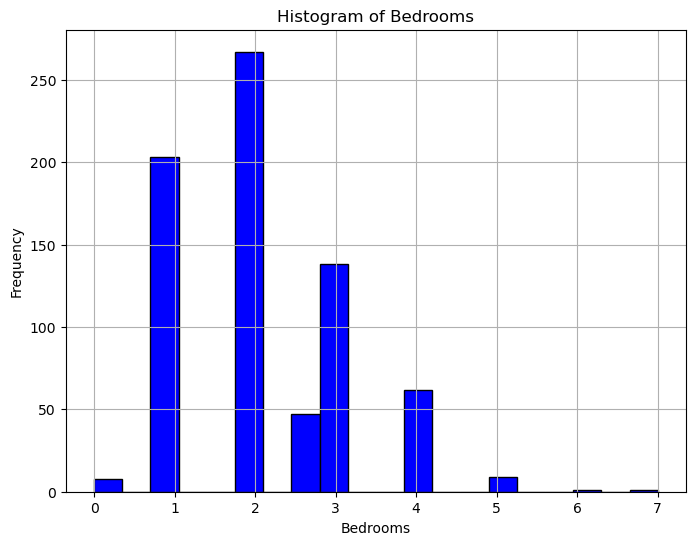

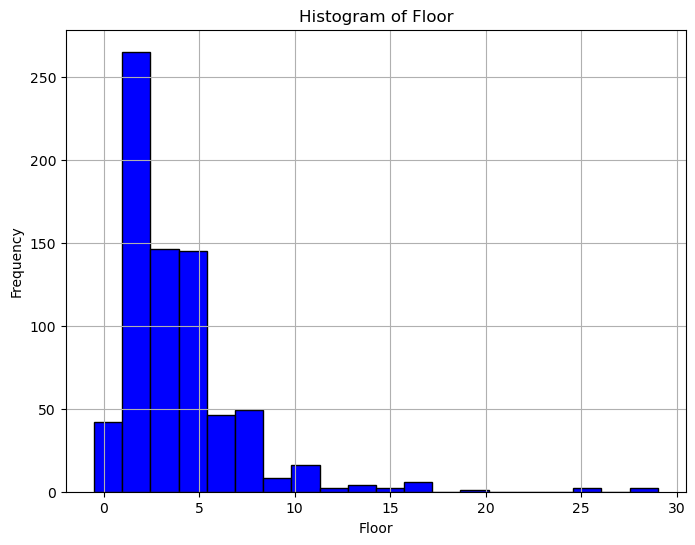

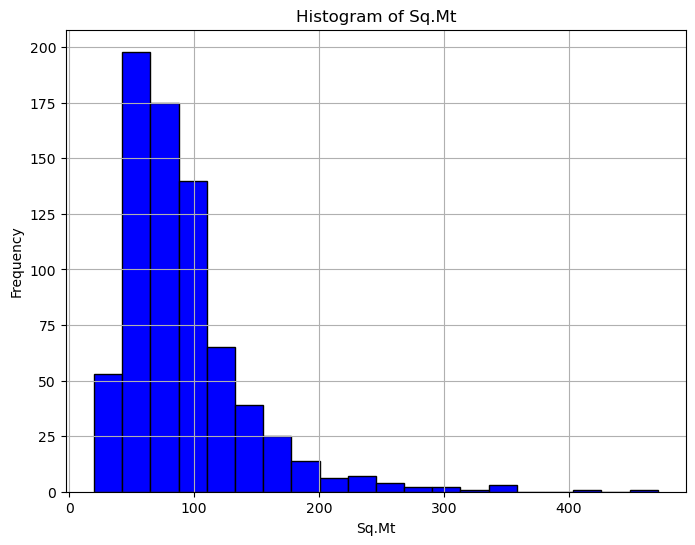

In [9]:
import matplotlib.pyplot as plt 

columns_to_plot = ['Bedrooms', 'Floor', 'Sq.Mt']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column].dropna(), bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Part 5:Remove all rows with Floor>20

In [10]:
# Set the value for 'Floor' of <= 20
data = data[data['Floor'] <= 20]

print(data)

        Id       District                                        Address  \
0     1390         Centro             Ático en calle de Alberto Aguilera   
6     1166         Centro             Piso en plaza del Conde de Miranda   
10    1445    Carabanchel                         Piso en calle Alcaudón   
13     448        Moncloa  Piso en calle del Doctor Juan José López Ibor   
15    2125          Usera                     Piso en calle del petróleo   
...    ...            ...                                            ...   
2074  2130      Vicálvaro                  Piso en calle de San Cipriano   
2079  1699       Chamberí                       Ático en calle Monteleón   
2080  1789       Chamberí                       Piso en calle de almagro   
2082    16  Ciudad Lineal                Ático en calle natalia de silva   
2083  1411    Carabanchel                          Piso en calle alondra   

     Number                         Area  Rent  Bedrooms  Sq.Mt  Floor  Outer  \
0     

## Part 6: Split data to train (70%) and val (15%) and test (15%)


In [11]:
from sklearn.model_selection import train_test_split

# Choose 'Rent' as target column
target_column = 'Rent'

# Split data into train, val, and test sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Display the sizes
print('Train set size: ', len(train_data))
print('Validation set size: ', len(val_data))
print('Test set size: ', len(test_data))

Train set size:  512
Validation set size:  110
Test set size:  110


## Part 7: Impact encode "Area" with respect to target variable ("Rent"), replacing the original column with the encoded column.

Note that the encoding is computed only using the training set, but must be applied to the val and test set as well.  If the val/test set contain rows with "Area" that was not observed in the training, then the encoding cannot be computed for those rows, and they should be removed.

In [12]:
from sklearn.model_selection import train_test_split

target_column = 'Rent'
area_column = 'Area'

# Split the data into train, val, and test sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Compute impact encoding for 'Area' using the training set
area_means = train_data.groupby(area_column)[target_column].mean()
area_encoding = area_means.to_dict()

# Apply encoding to the training, validation, and test sets
train_data[area_column] = train_data[area_column].map(area_encoding)
val_data[area_column] = val_data[area_column].map(area_encoding)
test_data[area_column] = test_data[area_column].map(area_encoding)

# Remove rows from val and test where 'Area' values were not observed in the training set
val_data = val_data[val_data[area_column].notna()]
test_data = test_data[test_data[area_column].notna()]

# Display dataset
print("Training set:")
print(train_data)
print("\nValidation set:")
print(val_data)
print("\nTest set:")
print(test_data)

Training set:
        Id       District                           Address Number  \
633     98  Ciudad Lineal   Dúplex en calle de Átngel Muñoz     22   
1965   469        Moncloa        Piso en calle Valdeverdeja     33   
1861  1099        Barajas        Piso en avenida de Logroño    112   
451   1084        Barajas      Piso en calle del Gran Poder     14   
1085  2039         Tetuán           Piso en calle de Orense     69   
...    ...            ...                               ...    ...   
229   1296         Centro            Piso en calle Zorrilla     23   
303   1698       Chamberí  Estudio en calle Marqués de Lema      7   
768    965      Salamanca         Piso en Conde de Peñalver     88   
1202  2027         Tetuán             Piso en calle Robledo      4   
287   1227         Centro            Piso en calle Mancebos      8   

             Area  Rent  Bedrooms  Sq.Mt  Floor  Outer  Elevator  Penthouse  \
633   1354.166667  1300     1.000   95.0    4.0    1.0       1.0  